In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import seaborn as sns

In [6]:
df = pd.read_csv("capstone project/Dentistry Dataset.csv")

In [8]:
df.sample(10)

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
709,710,NaN,25,Male,25.54,25.54,7.29,7.29,7.30,7.30,0.285,0.285,0.286,0.286
898,899,NaN,18,Male,28.23,28.23,6.76,6.76,6.91,6.91,0.238,0.238,0.243,0.243
1043,1044,NaN,24,Male,26.49,26.49,7.03,7.03,7.14,7.14,0.265,0.265,0.269,0.269
505,506,NaN,19,Female,25.79,25.79,6.61,6.61,6.61,6.61,0.255,0.255,0.255,0.255
141,142,NaN,20,Female,26.24,26.29,6.10,6.10,6.47,6.47,0.232,0.232,0.246,0.246
559,560,NaN,25,Female,24.42,24.42,5.47,5.47,5.48,5.48,0.223,0.223,0.224,0.224
758,759,NaN,23,Male,25.91,25.90,6.58,6.58,6.73,6.73,0.254,0.254,0.260,0.260
127,128,NaN,22,Female,25.05,25.06,6.05,6.07,6.31,6.31,0.241,0.241,0.253,0.253
593,594,NaN,23,Female,26.22,26.22,6.51,6.51,6.51,6.51,0.248,0.248,0.248,0.248
205,206,NaN,18,Female,24.52,24.56,6.48,6.49,6.50,6.50,0.264,0.264,0.264,0.264


In [10]:
df_cleaned = df.drop(columns=["Sl No", "Sample ID"])

In [12]:
df_cleaned.describe(include="all")

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,1100,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,21.625455,NaN,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,2.085892,NaN,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,18.000000,NaN,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.000000,NaN,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,22.000000,NaN,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,23.000000,NaN,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000


In [14]:
df_cleaned.dtypes

Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

In [16]:
df_cleaned.sample()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
48,21,Female,24.87,24.87,6.59,6.59,6.59,6.59,0.264,0.264,0.264,0.264


In [18]:
df_cleaned.shape

(1100, 12)

In [20]:
#Handeling Missing Value

In [23]:
df_cleaned.isnull().sum()

Age                                0
Gender                             0
inter canine distance intraoral    0
intercanine distance casts         0
right canine width intraoral       0
right canine width casts           0
left canine width intraoral        0
left canine width casts            0
right canine index intra oral      0
right canine index casts           0
left canine index intraoral        0
left canine index casts            0
dtype: int64

In [25]:
##There is no missing value

In [31]:
#Encoding categorical data
df_cleaned.dtypes

Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

In [33]:
df_cleaned["Gender"] = LabelEncoder().fit_transform(df_cleaned["Gender"])

In [36]:
df_cleaned.dtypes

Age                                  int64
Gender                               int32
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

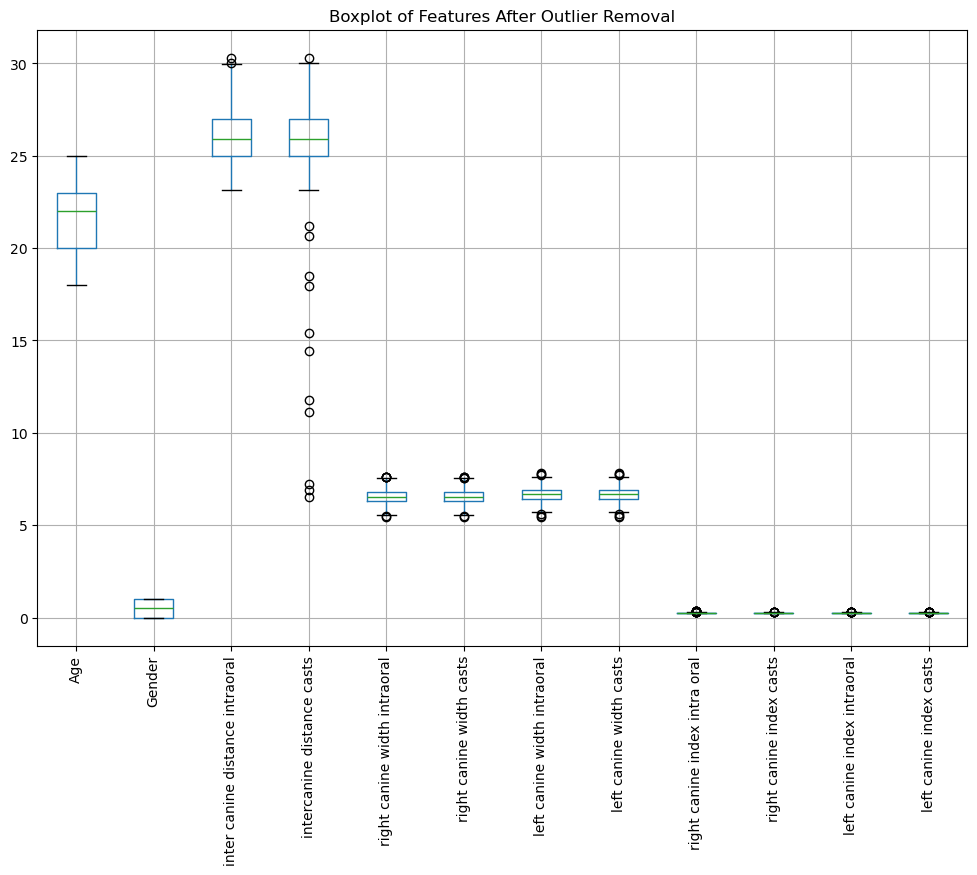

In [38]:
##Identifying and Handeling Outliers
# Box plot to identify outliers
plt.figure(figsize=(12, 8))
df_cleaned.boxplot(rot=90)
plt.title("Boxplot of Features After Outlier Removal")
plt.show()

In [40]:
# Removing Outliers
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned.shape

(1054, 12)

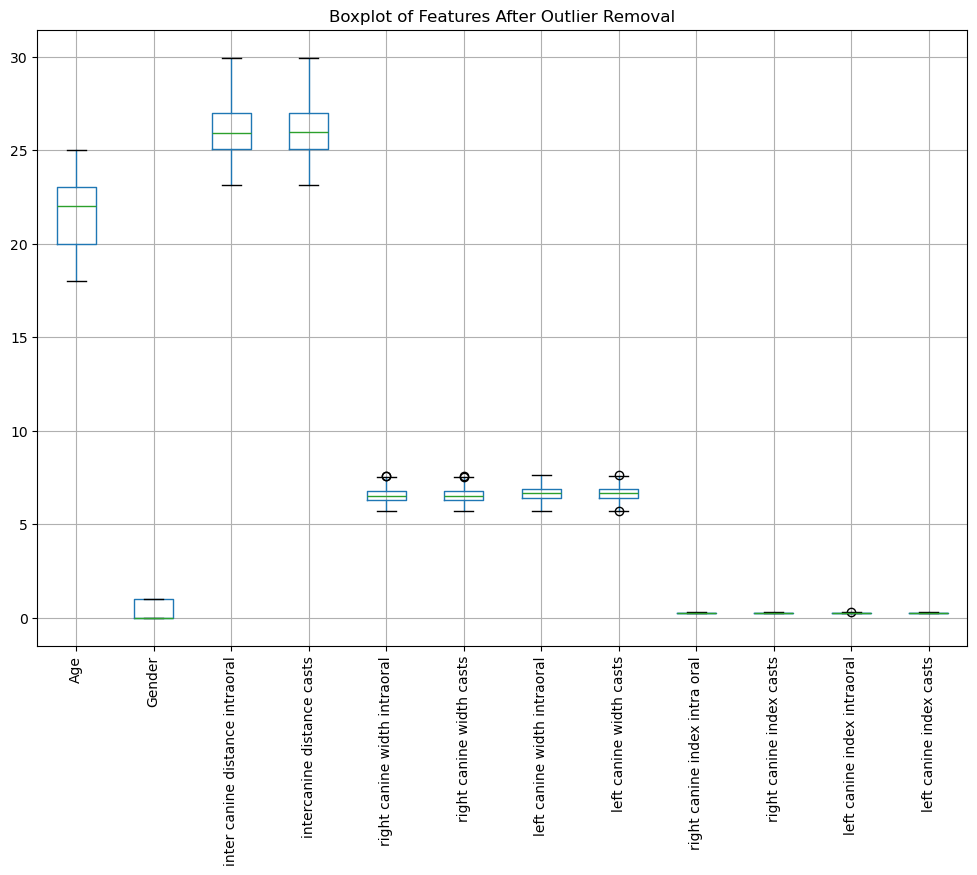

In [42]:
# Box plot after removing outliers
plt.figure(figsize=(12, 8))
df_cleaned.boxplot(rot=90)
plt.title("Boxplot of Features After Outlier Removal")
plt.show()

In [44]:
X = df_cleaned.drop(columns=["Gender"])
y = df_cleaned["Gender"]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'inter canine distance intraoral'}>,
        <Axes: title={'center': 'intercanine distance casts'}>],
       [<Axes: title={'center': 'right canine width intraoral'}>,
        <Axes: title={'center': 'right canine width casts'}>,
        <Axes: title={'center': 'left canine width intraoral'}>],
       [<Axes: title={'center': 'left canine width casts'}>,
        <Axes: title={'center': 'right canine index intra oral'}>,
        <Axes: title={'center': 'right canine index casts'}>],
       [<Axes: title={'center': 'left canine index intraoral'}>,
        <Axes: title={'center': 'left canine index casts'}>, <Axes: >]],
      dtype=object)

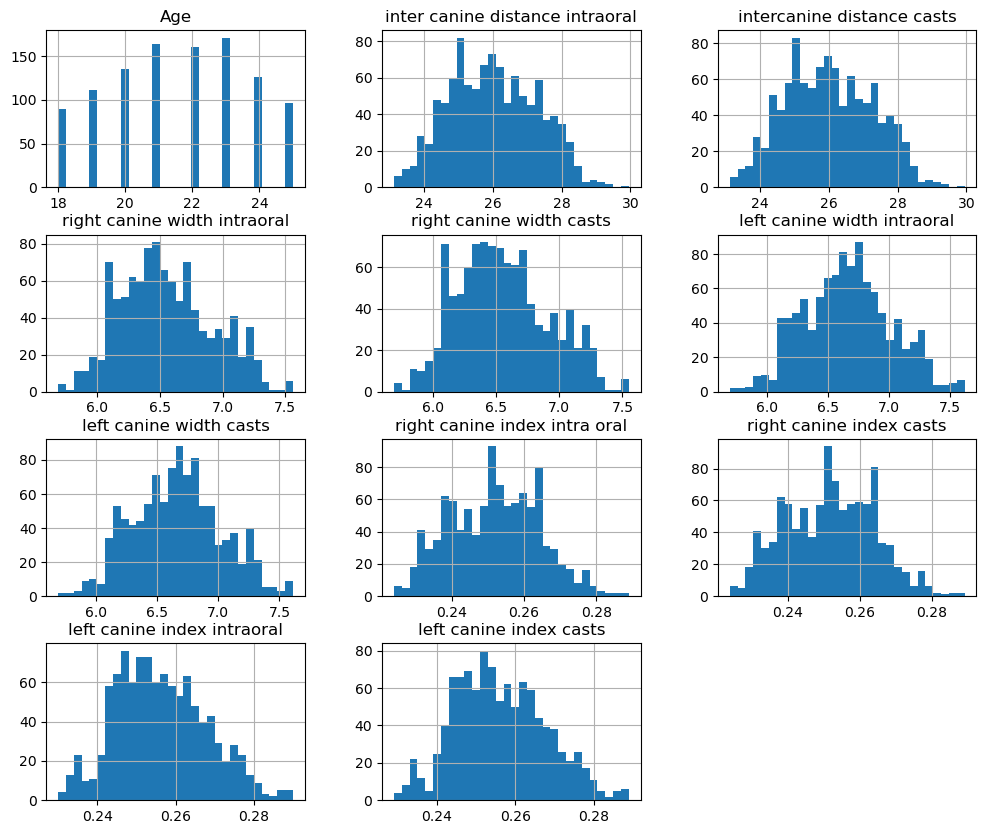

In [46]:
# plot see if columns are normalized
X.hist(figsize=(12, 10), bins=30)

In [48]:
#normalise the x variable
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)
X = pd.DataFrame(X_normalized, columns=X.columns)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'inter canine distance intraoral'}>,
        <Axes: title={'center': 'intercanine distance casts'}>],
       [<Axes: title={'center': 'right canine width intraoral'}>,
        <Axes: title={'center': 'right canine width casts'}>,
        <Axes: title={'center': 'left canine width intraoral'}>],
       [<Axes: title={'center': 'left canine width casts'}>,
        <Axes: title={'center': 'right canine index intra oral'}>,
        <Axes: title={'center': 'right canine index casts'}>],
       [<Axes: title={'center': 'left canine index intraoral'}>,
        <Axes: title={'center': 'left canine index casts'}>, <Axes: >]],
      dtype=object)

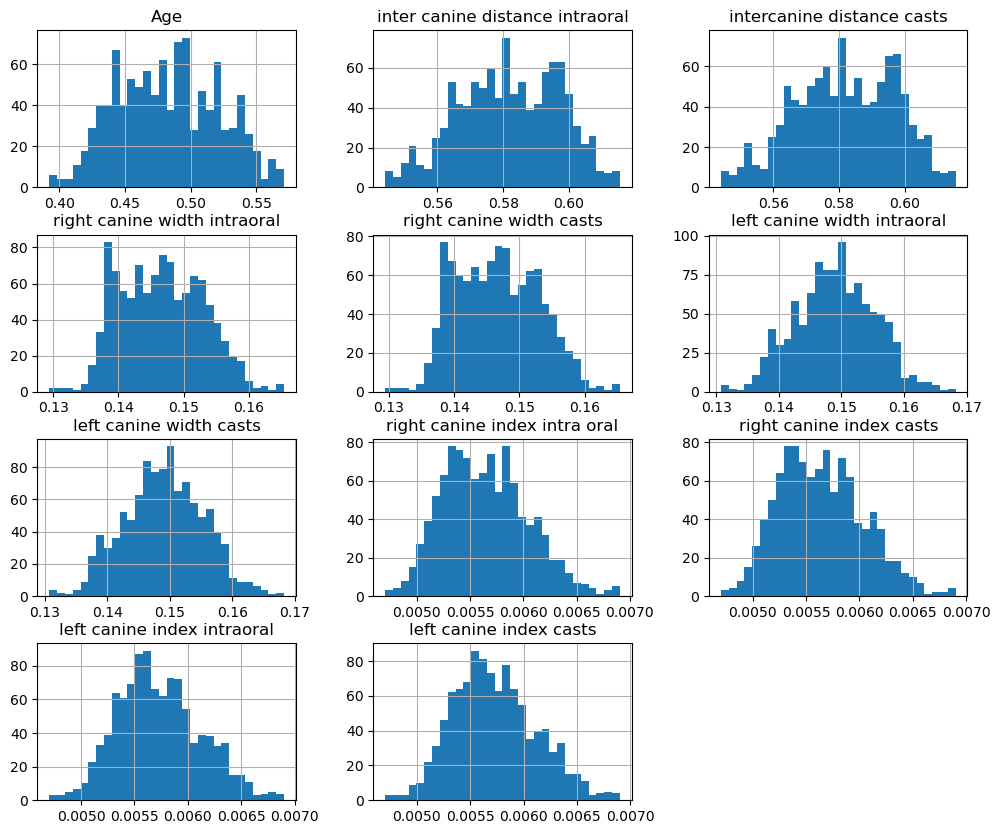

In [50]:
# plot see if columns are normalized after normalization
X.hist(figsize=(12, 10), bins=30)

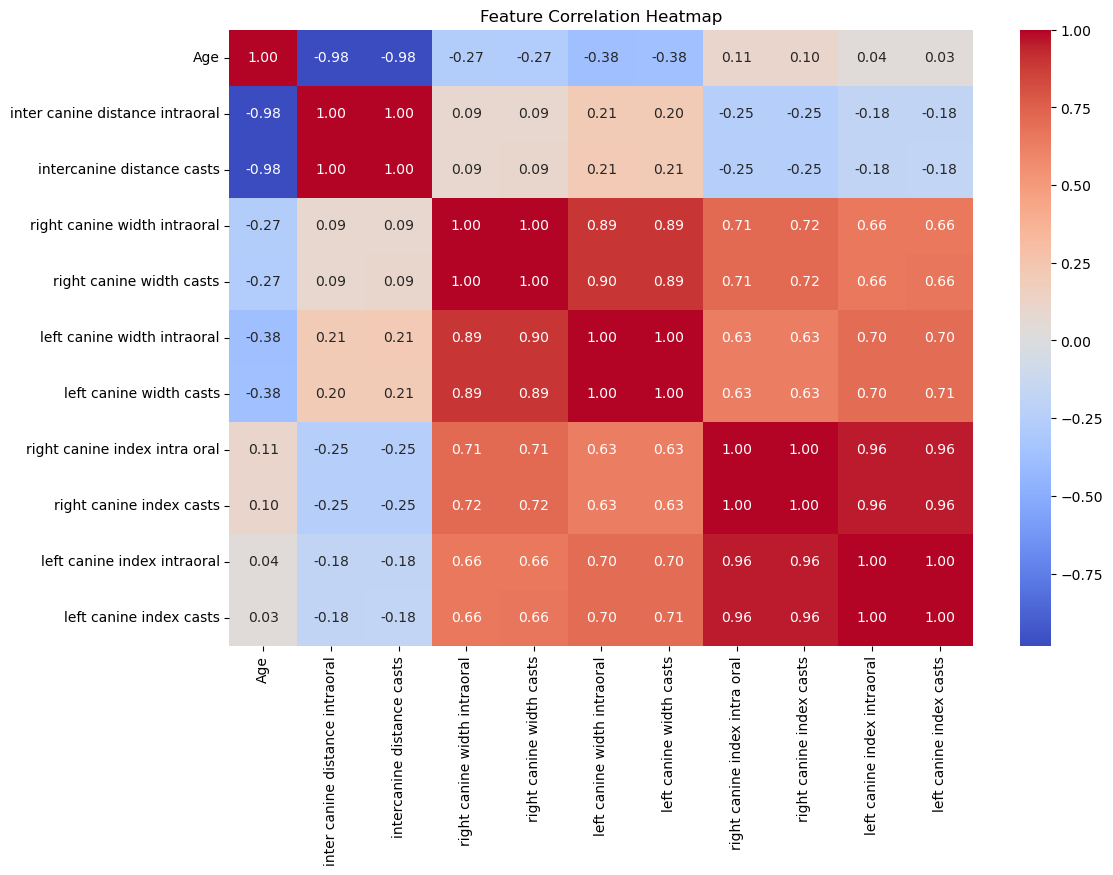

In [52]:
# Correlation heatmap to check which columns are correlated
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [54]:
# removing highly correlated features 
corr_matrix = X.corr()
threshold = 0.9
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            to_drop.add(corr_matrix.columns[i])
X_reduced = X.drop(columns=to_drop)

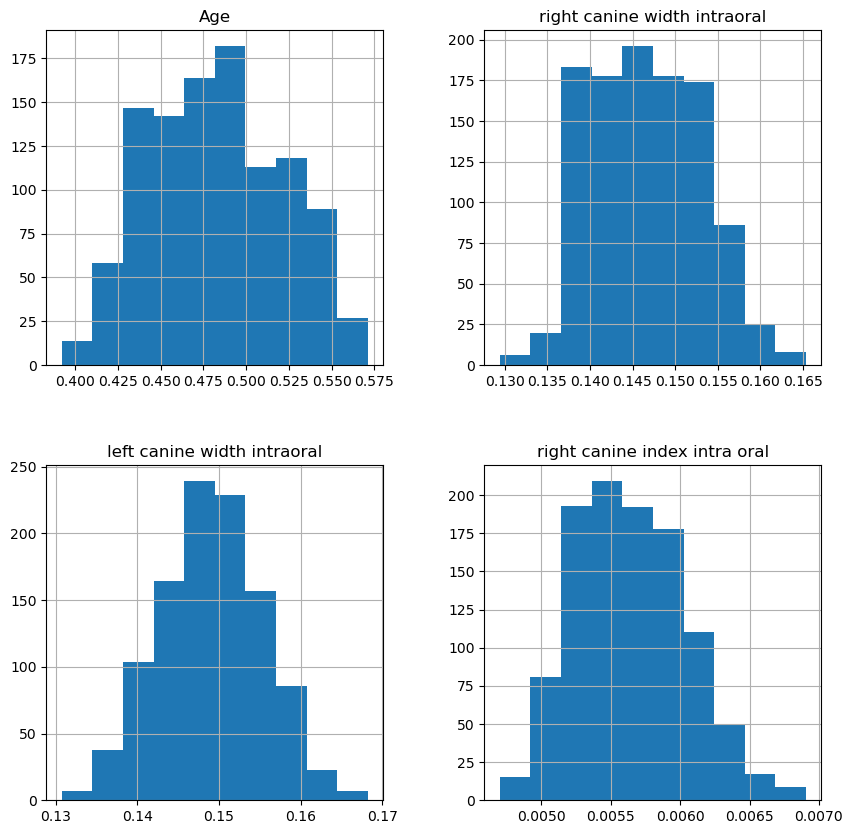

In [56]:
X_reduced.hist(figsize=(10,10))
plt.show()

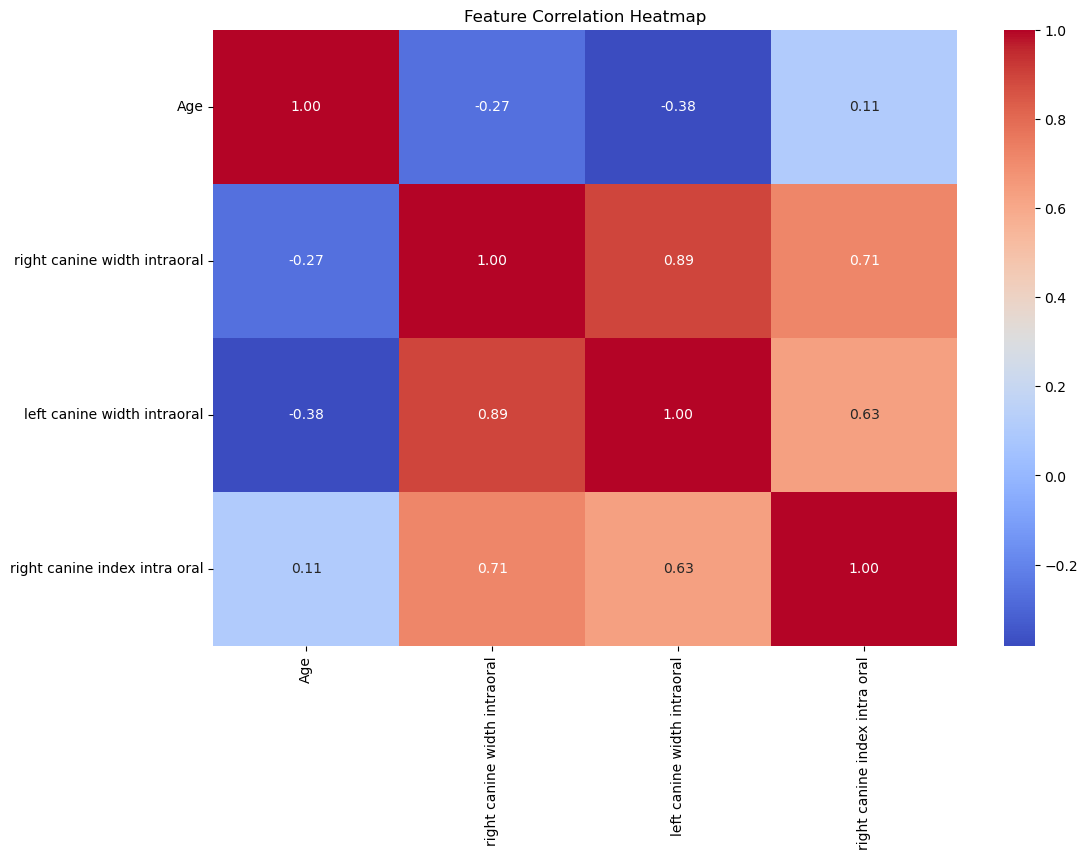

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_reduced.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [62]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

Logistic Regression Accuracy: 0.5552
Precision: 0.6383, Recall: 0.1948, F1 Score: 0.2985
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.90      0.67       163
           1       0.64      0.19      0.30       154

    accuracy                           0.56       317
   macro avg       0.59      0.55      0.49       317
weighted avg       0.59      0.56      0.49       317



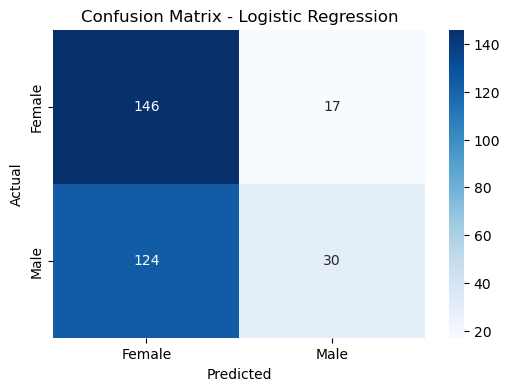

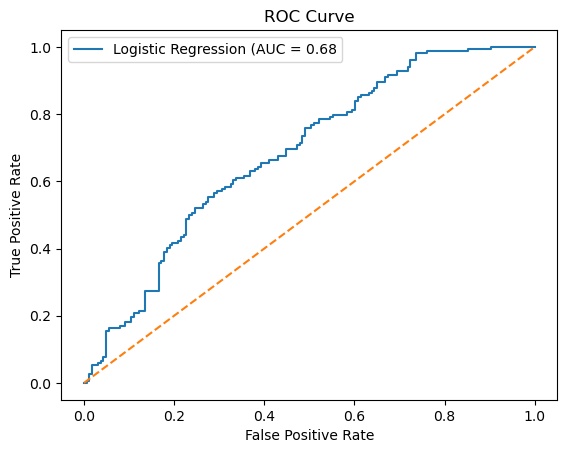

Decision Tree Accuracy: 0.8707
Precision: 0.8383, Recall: 0.9091, F1 Score: 0.8723
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       163
           1       0.84      0.91      0.87       154

    accuracy                           0.87       317
   macro avg       0.87      0.87      0.87       317
weighted avg       0.87      0.87      0.87       317



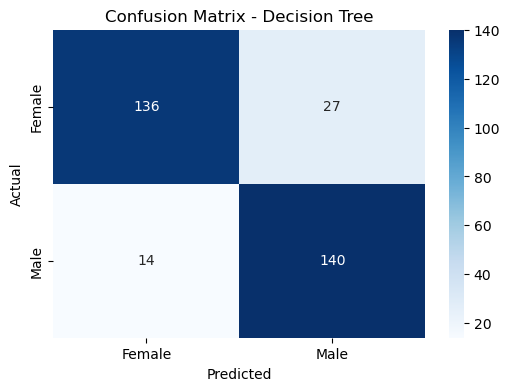

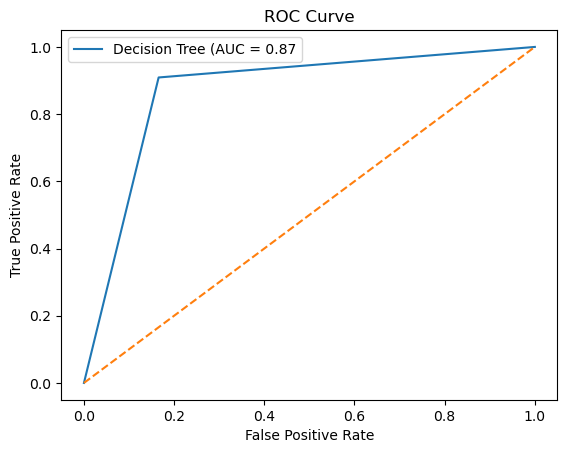

Random Forest Accuracy: 0.9243
Precision: 0.9167, Recall: 0.9286, F1 Score: 0.9226
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       163
           1       0.92      0.93      0.92       154

    accuracy                           0.92       317
   macro avg       0.92      0.92      0.92       317
weighted avg       0.92      0.92      0.92       317



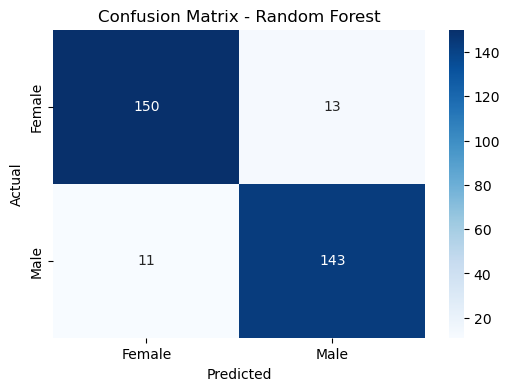

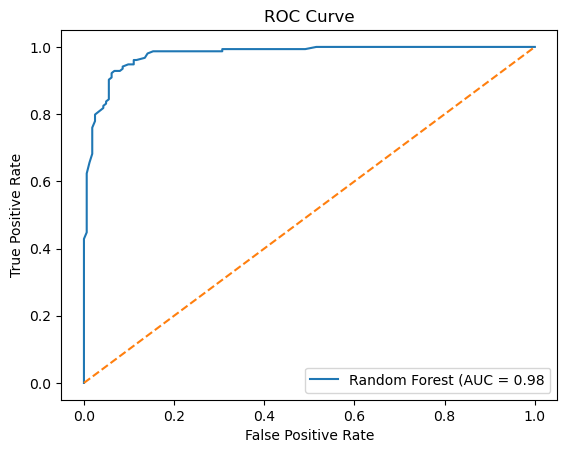

C:\Users\vinay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:46:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9274
Precision: 0.9119, Recall: 0.9416, F1 Score: 0.9265
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       163
           1       0.91      0.94      0.93       154

    accuracy                           0.93       317
   macro avg       0.93      0.93      0.93       317
weighted avg       0.93      0.93      0.93       317



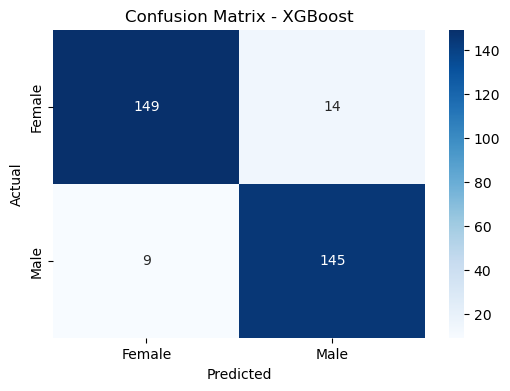

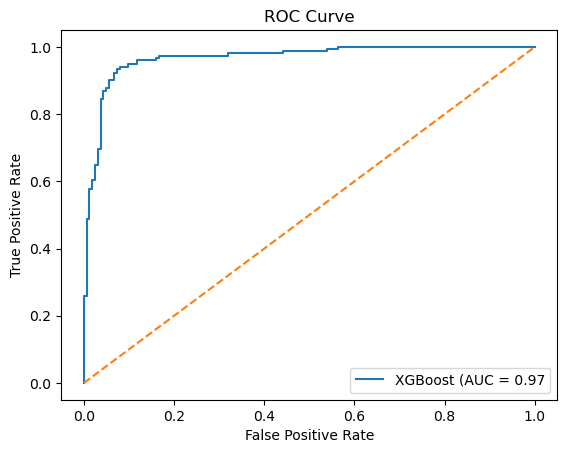

In [64]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Female", "Male"], yticklabels=["Female", "Male"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f}')

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [66]:
# Step 13: Print final results
print("Final Model Accuracies:", results)

Final Model Accuracies: {'Logistic Regression': 0.555205047318612, 'Decision Tree': 0.8706624605678234, 'Random Forest': 0.9242902208201893, 'XGBoost': 0.9274447949526814}


In [68]:
model_n = ""
accuracy_h = 0
for m,a in results.items():
    if a > accuracy_h:
        model_n = m
        accuracy_h = a
print(f'{model_n} has the highest accuracy and accuracy is {accuracy_h}')

XGBoost has the highest accuracy and accuracy is 0.9274447949526814
